## Step 1 | Library & Configurations

In [51]:
%%time

from gc import collect;
from warnings import filterwarnings;
import re

import numpy as np
import pandas as pd
from scipy import stats

from itertools import cycle, combinations

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud

from io import StringIO

filterwarnings('ignore');
from IPython.display import display, HTML, display_html, clear_output;

# Opcional: clase para colores
# Set the plot style to 'fivethirtyeight'
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Define global styling properties
global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

clear_output();
print();
collect();


CPU times: total: 93.8 ms
Wall time: 102 ms


In [52]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


## Step 2 | Load Dataset

In [53]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('salaries.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: total: 172 ms
Wall time: 152 ms


## Step 3 | Attribute Overview

In [54]:
def display_dataframe_with_custom_header(df, show_head=False):
    # Define global styling properties
    global_style = {
        "background-color": "#2e3440",
        "color": "#FFFF00",
        "border": "1.5px solid black",
        "font-weight": "bold",
        "font-family": "'Courier New', Courier, monospace"  # Use monospace font for table view
    }

    # Add custom text at the top with "Poetsen One" font and wave effect
    header_text = """
    <h2 style='color: #FF5733; font-weight: bold; font-family: "Poetsen One", sans-serif;
                animation: wave 1.5s infinite;'>
        D<span style="color: #FFFF00;">A</span>T<span style="color: #FFFF00;">A</span>FRAME 
        {frame_type} 
    </h2><br>

    <style>
    @keyframes wave {{
        0% {{ transform: rotate(-2deg); }}
        50% {{ transform: rotate(2deg); }}
        100% {{ transform: rotate(-2deg); }}
    }}
    </style>
    """

    if show_head:
        frame_type = "HEAD"  # Change frame type to "HEAD" for head display
    else:
        frame_type = "INFORMATION"  # Default to "INFORMATION" for info display

    header_text = header_text.format(frame_type=frame_type)  # Format the header text

    if show_head:
        # Get the head of the DataFrame
        df_to_display = df.head()

        # Convert head DataFrame to HTML table
        df_html = df_to_display.to_html(index=False, classes='styled-table', header=True)

        # Apply styling to the table
        styled_df = f'''
        <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.9em;
            font-family: sans-serif;
            min-width: 400px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }}
        .styled-table thead th {{
            padding-top: 12px;
            padding-bottom: 12px;
            text-align: left;
            background-color: #2e3440;
            color: ##81a1c1;
            border: 1px solid #ddd;
            font-weight: bold;
        }}
        .styled-table tbody td {{
            padding: 12px 15px;
            border: 1px solid #ddd;
        }}

        .wave-animation {{
            animation: wave 1.5s infinite;
        }}
        </style>
        {header_text}
        {df_html}
        '''
    else:
        # Redirect printed output to a string
        info_output = StringIO()
        with pd.option_context('display.max_info_rows', 1000, 'display.max_info_columns', 1000):
            df.info(buf=info_output)

        # Get the printed info as a string
        info_string = info_output.getvalue()

        # Apply styling to the string
        styled_df = f'''
        {header_text}
        <pre style="{";".join([f"{key}: {value}" for key, value in global_style.items()])};">
        {info_string}
        </pre>
        '''

    # Google Fonts link
    google_fonts_link = "<link href='https://fonts.googleapis.com/css2?family=Poetsen+One&display=swap' rel='stylesheet'>"

    # HTML content including Google Fonts link and styled DataFrame
    html_content = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Dataframe Information</title>
        {google_fonts_link}
    </head>
    <body>
        {styled_df}
    </body>
    </html>
    '''

    # Display HTML content
    display(HTML(html_content))

In [35]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


## Step 4 | Missing Value Handling

In [55]:
def plot_missing_values_heatmap(df):
    # Calculate the sum of missing values excluding the first column
    missing_values_sum = df.isna().iloc[:, 1:].sum()

    # Create a custom color palette
    custom_palette = sns.color_palette("colorblind", as_cmap=True)  # Example palette, you can choose any palette you like

    # Create a heatmap plot
    plt.figure(figsize=(22, 4), facecolor='silver')
    ax = sns.heatmap(missing_values_sum.to_frame(name='').T.rename(columns=lambda x: x.replace('_', ' ').title()), 
                     cmap=custom_palette, annot=True, fmt='0.0f',
                     annot_kws={"fontsize":30, "fontweight": "bold"},  # Adjust font size and weight for annotations
                     linecolor='black', linewidth=2)  # Set the color and width of the frame

    # Set title and adjust fontsize
    plt.title('Count of Missing Values', pad=20, fontsize=18, color='#FF9734', fontname='Calibri', fontweight='bold')

    # Rotate the x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15, fontweight='bold')

    # Adjust font size and weight of y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, fontweight='bold')

    # Show the plot
    plt.show()

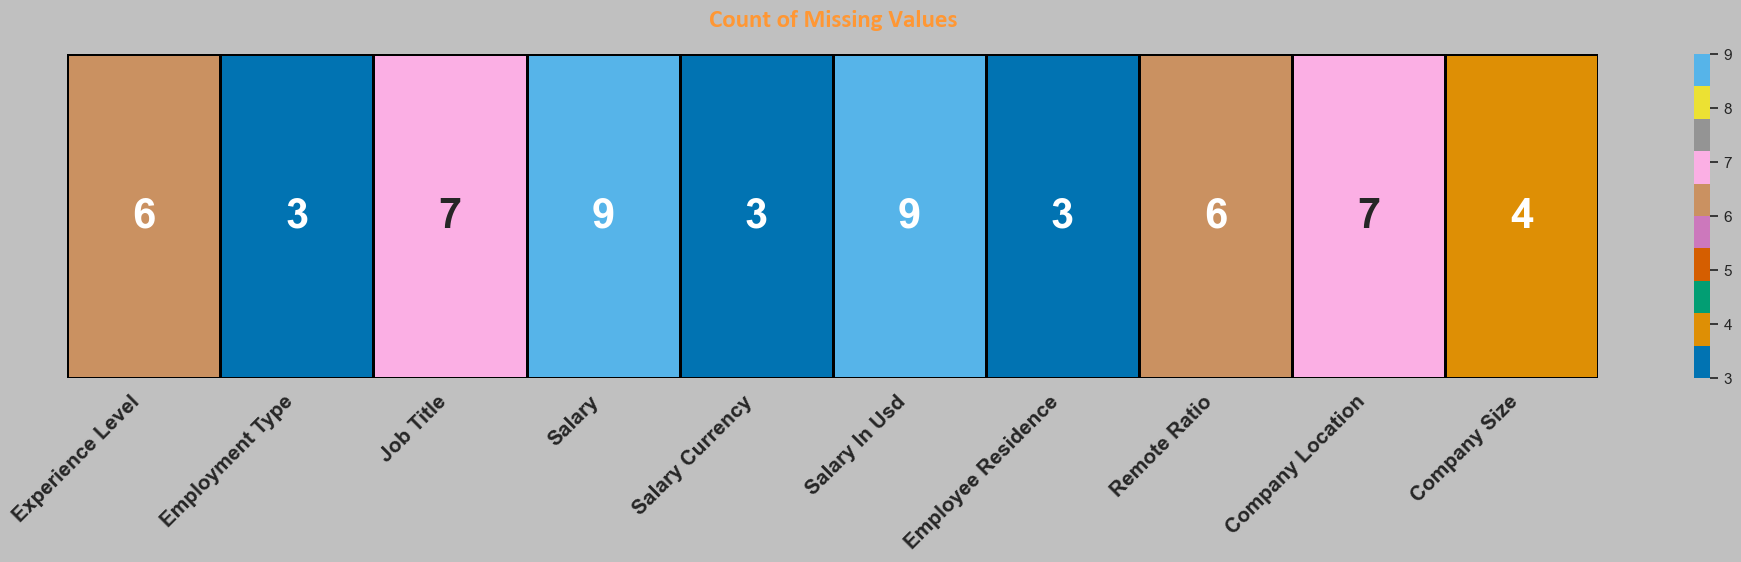

In [56]:
plot_missing_values_heatmap(df)

## Step 5 | Duplicate Value Manage

In [47]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 39125 duplicate values


In [48]:
def apply_duplicated_styling(df):
    
    # Define a function to apply font size and color to values
    def apply_style(value):
        if value:
            return 'font-size: 20px; color: red'
        else:
            return 'font-size: 20px; color: green'

    # Define a function to apply font size to column names
    def apply_column_name_style(value):
        return 'font-size: 20px'

    # Transpose the DataFrame and check for duplicated values along the rows
    column_duplicates = df.T.duplicated()

    # Apply styling to the DataFrame containing duplicated values
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Apply styling to the column names
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '20px')]}])

    return styled_column_duplicates

In [26]:
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


## Step 6 | Statistical Data Summary

In [49]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()  # Initialize an empty dataframe

    # Measure of central tendency
    stat['Mean'] = numeric_df.mean()  # for mean of all columns
    stat['Median'] = numeric_df.median()  # for median of all columns
    stat['Mode'] = numeric_df.mode().iloc[0]  # for mode of all columns

    # Measure of dispersion
    stat['Range'] = (numeric_df.max() - numeric_df.min())
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()

    # Interquartile range
    stat['IQR'] = [stats.iqr(numeric_df[i]) for i in numeric_df.columns]

    # Quantiles
    stat['25%'] = numeric_df.quantile(q=0.25, axis=0)
    stat['50%'] = numeric_df.quantile(q=0.50, axis=0)
    stat['75%'] = numeric_df.quantile(q=0.75, axis=0)

    # Minimum and maximum
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()

    # Skewness and Kurtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()

    # Transpose the DataFrame
    stat = stat.T

    # Apply the float format
    stat = stat.applymap('{:,.2f}'.format)

    # Apply the background color with transparency
    styled_df = stat.style.apply(lambda x: [f'background: rgba(173, 216, 230, {opacity})' for val in x], axis=1)
    
    # Apply font size
    styled_df = styled_df.set_properties(**{'font-size': font_size})
    
    return styled_df

In [28]:
# Example usage:
# Assuming you have a DataFrame called 'df' and want to set transparency to 0.5
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,"2,023.38","162,503.52","151,029.73",29.43
Median,"2,023.00","143,000.00","142,200.00",0.00
Mode,"2,024.00","100,000.00","150,000.00",0.00
Range,4.00,"30,386,000.00","785,000.00",100.00
Stdev,0.71,"307,049.72","68,579.48",45.23
Variance,0.50,"94,279,528,420.23","4,703,144,919.03","2,046.06"
IQR,1.00,"86,500.00","86,750.00",100.00
25%,"2,023.00","103,500.00","103,000.00",0.00
50%,"2,023.00","143,000.00","142,200.00",0.00
75%,"2,024.00","190,000.00","189,750.00",100.00


In [50]:
def variable_summary(df, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values

        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

In [30]:
# DataFrame called 'df'
summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,work_year,int64,20565,5,0
1,experience_level,object,20565,4,0
2,employment_type,object,20565,4,0
3,job_title,object,20565,153,0
4,salary,int64,20565,3023,0
5,salary_currency,object,20565,24,0
6,salary_in_usd,int64,20565,3424,0
7,employee_residence,object,20565,88,0
8,remote_ratio,int64,20565,3,0
9,company_location,object,20565,78,0
